# Technical Assignment

### 2021.03.26, Ian Yu

## Table of Content


1. [Overview](#Overview)
    - [Problem](#Problem)
    - [Objective](#Objective)
    - [Guidance](#Guidance)

<n></n>

2. [Explore Documentation](#Explore-Documentation)
    - [What is the Business About?](#What-is-the-Business-About?)
    - [Why Is It Important to Explore the Business?](#Why-Is-It-Important-to-Explore-the-Business?)
    - [What Are the Stages of Olist's Sales Funnels?](#What-Are-the-Stages-of-Olist's-Sales-Funnels?)

<n></n>

3. [Data Wrangling](#Data-Wrangling)
    - [Data Cleaning](#Data-Cleaning)
    - [Marketing Qualified Leads](#Marketing-Qualified-Leads)
    - [Closed Deals](#Closed-Deals)
    - [Insights and Recommendations From Data Cleaning](#-Insights-and-Recommendations-From-Data-Cleaning)

<n></n>

4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Basic EDA](#Basic-EDA)
    - [Conversion](#Conversion)
    - [Time Series Analysis](#Time-Series-Analysis)
    - [Insights and Recommendations From Exploring the Funnel](#Insights-and-Recommendations-From-Exploring-the-Funnel)

<n></n>

5. [Post-Sales](#Post-Sales)
    - [Single Seller Metrics](#Single-Seller-Metrics)

<n></n>

6. [Conclusion](#Conclusion)
    - [After Data Cleaning](#After-Data-Cleaning)
    - [After Exploring Funnel](#After-Exploring-Funnel)
    - [Metrics to Monitor](#Metrics-to-Monitor)
    - [Future Development](#Future-Development)

## Overview

### Problem

This notebook is part of the Technical Assignment, with the following problem statement:

*Using the following dataset for an e-commerce business and its associated marketing funnel dataset, prepare a presentation summarizing the **funnel’s performance** and any relevant insights you found for the leadership team. Also analyze the datasets and propose some areas where we could take action on to improve the funnel’s performance.*

Datasets Provided:

[Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/olistbr/brazilian-ecommerce)

[Marketing Funnel by Olist](https://www.kaggle.com/olistbr/marketing-funnel-olist)

### Objective
The objective of this Notebook is to first explore the anonymized funnel dataset, lay out the Sales Funnel Stages, perform Exploratory Data Analysis, and identify areas of improvement.

### Guidance
This is an elaborate notebook; if you are interested in the results, please turn to [Conclusion](#Conclusion). The basic breakdown of the notebook is:

- Eplroe Olist's business model to understand the business context
- Data Wrangling while finding some insights
- Exploratory Data Analysis with basic charts, statistical analysis, and time series analysis
- Dabble into Post-Sales Analysis 
- Conclusion

Feel free to navigate through Table of Content and 
[Back to Top](#Table-of-Content) at the end of every section!

## Explore Documentation

Olist has provided elaborate documentation. Before delve into the actual data, it is important to get a high level understanding of the schema and domain knowledge. By the same token, instead of blindly applying common business metrics, we will explore as much as we can before start defining any metrics to track.


As such, this section will be a **reflection** on the documentation provided by Olist. If one is familiar with their dataset, please feel free to [skip ahead](Exploratory-Data-Analysis).


### What is the Business About?
[Olist Store](https://olist.com/) is a Brazilian Marketplace of E-Commerce Marketplaces. Rather than interacting with multiple marketplaces like Amazon, merchants can sign up easily with Olist and be connected with all marketplaces at once. [Otter](https://www.tryotter.com/) has the same idea, but for food delivery. 

Olist is the point of contact for Mom-and-Pop shops to listing products, place advertisement, and logistics. Olist has 4 solutions:

|**Solutions**|**Description**|
|:--|:--|
|Olist Store|Sell on multiple marketplaces at once|
|Olist Shop|Create dedicated Olist Shop|
|Olist Pax|Logistics capabilities|
|Olist Premium|Enterprise solutions|

<body align="center"><i>
        
                    Note: Translation may be wrong, as it was done through Google Translate
    

</i></body>

Through aggregated data, they are also able to find most of the products on catalogue, further removing friction for the merchants. At the same time, they can find competitive pricing in real-time for each product. 

<img src="https://i.imgur.com/JuJMns1.png" align="center" alt="Smartphone Listing" width="60%">
</img>

[Back to Top](#Table-of-Content)

### Why Is It Important to Explore the Business?

Qualitative understanding of the business helps define the key factors to success. Unlike a typical eCommerce, Olist is primarily dealing with Business Customers, and their success is the key driver to Olist's success. From the get go, in order to improve the Sales Funnel, we will need to examine:

- **Reach to Leads:** Including how do we generate reach and the conversion to leads
- **Leads to Sales:** This would be multi-stage, from leads to all levels of qualified leads to close deal 
- **Post-Sales:** Unlike the consumer world, where loyalty is great to have but not detrimental, Post-Sales experience for the vendors are the true measure of success. 

Our focus for this Notebook is still the funnel's success, but at the time of writing this section, we should acknowledge Post-Sales as part of the funnel in this specific context. Olist would be the type of business that relies on Customer-Led Growth. The following image is a schema of the E-Commerce data, and though we will not be exploring these immediately, they will come important in later stages of the funnel.

<img src="https://i.imgur.com/HRhd2Y0.png" align="center" alt="E-Commerce Schema" width="60%">
</img>

This schema includes not only the seller, but also the consumer data. Going back to understanding that Olist is a marketplace of marketplaces, we may be able to find out:

**What price points and categories have the most successful sellers?**  
Just like we the general customers shopping on Amazon are not looking for high-ticket items, as Olist is in the business of aggregating marketplace, there will be a price ceiling (though a price floor is unlikely) for Olist. As a result, finding out what categories, especially given the partners that Olist has, perform the best could be important for Olist's marketing team to target new sellers. This may also be strategic to future capabilities to develop. 

**Seller Experience**
Seller Experience in the initial phase is arguably the most important part of the sales. Through this dataset, we may be able to identify the general momentum for a new seller, especially given a seller profile type, as well as the golden window. In other words, is it the initial 30 days or 90 days that make or break a new champion?

**Consumer Market**
Through ratings and orders, we may find even for the same product, there are general differences between each platform. Hyperprofiling of the consumers may help us to determine the optimal categories, or even seller profile, that our marketing team should look out for.

There will be some custom KPIs that need to be explored to measure sellers' success within the E-Commerce dataset, but for now, we need to take a look at the funnel more.

[Back to Top](#Table-of-Content)

### What Are the Stages of Olist's Sales Funnels?

The stages as described by [Olist](https://www.kaggle.com/olistbr/marketing-funnel-olist) is as follows:

1. **Sign-up** at a landing page.
2. Get contacted by a Sales Development Representative (SDR), confirm some information and **schedule** a consultancy.
3. Consultancy is made by a Sales Representative (SR). The SR may **close the deal** (lead sing up) or lose the deal (led leaves without sign in)
4. Lead **becomes a seller** and starts building his catalog on Olist.
5. His **products are published** on marketplaces and ready to sell!


<img src="https://i.imgur.com/Jory0O3.png" align="center" alt="Funnel Schema" width="60%">
</img>

To be extra clear, SDRs are lead qualifiers, whereas SRs are deal closers.

From here, we will start performing Exploratory Data Analysis.

[Back to Top](#Table-of-Content)

## Data Wrangling

In this section, we will start with understanding the funnel datasets with basic analysis, and then dive into statistical analysis. Olist provides two datasets, representing two stages. The first dataset, Marketing Qualified Leads, consists of leads requested to contact. This means we are missing:

- Reach to Landing Page: This data may be hard to gather sometimes, as some reach may be through social gathering events, but it would have been great to know the how well we would pique initial interests.
- Landing Page to Sign-up: As the Sign-Up page is a website, Web Analytics tools like Google Analytics should be able to extract basic information. Through interaction on the website, we may be able to analyze what makes possible leads not sign up in the end.

**So we won't be able to measure Traffic, Return Traffic, and Marketing effectiveness.**

Granted, the above two points are filled with noise and not suitable for a small team to dive in. Marketing Qualified Leads would be people who scheduled for call, and Closed Deals dataset is whether they or not, after contact, they signed up. Effectively, we are looking at the effectiveness of the consultancy.

### Data Cleaning

To make life easier, we have created a custom-built class called Olist to manipulate our data. Instead of downloading CSV files and read from local, we will read from the public S3 bucket `ianyu-public-data`. 

In [1]:
# Import necessary packages
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append("..")

In [238]:
# Import datasets
from eCommerce.data import Olist

# Calling an instance of Olist 
olist = Olist()

# Get all tables available
olist.table_names()

# Show dictionary of tables available
olist.tables

{'closed_deals': 'olist/olist_closed_deals_dataset.csv',
 'customers': 'olist/olist_customers_dataset.csv',
 'geolocation': 'olist/olist_geolocation_dataset.csv',
 'marketing_qualified_leads': 'olist/olist_marketing_qualified_leads_dataset.csv',
 'order_items': 'olist/olist_order_items_dataset.csv',
 'order_payments': 'olist/olist_order_payments_dataset.csv',
 'order_reviews': 'olist/olist_order_reviews_dataset.csv',
 'orders': 'olist/olist_orders_dataset.csv',
 'products': 'olist/olist_products_dataset.csv',
 'sellers': 'olist/olist_sellers_dataset.csv'}

In [381]:
# Get Marketing_Qualified_Leads and Closed_Deals to perform funnel analysis
mql = olist.get_table('marketing_qualified_leads')
cd = olist.get_table('closed_deals')

[Back to Top](#Table-of-Content)

#### Marketing Qualified Leads

We will first examine Marketing Qualified Leads. What does each column tell? How much data is missing? Some of the basic questions to answer. From the `mql.info()`, we can see that there are exactly 8000 entries and only 60 missing values from `origin`, or 0.75% of all the values. 

In [382]:
# Dataframe information
mql.info()

# Find out percentage of the missing values. 
mql.isna().sum() / mql.shape[0] * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


mql_id                0.00
first_contact_date    0.00
landing_page_id       0.00
origin                0.75
dtype: float64

In [383]:
# Read the first 5 rows
mql.head()

mql_id first_contact_date  \
0  dac32acd4db4c29c230538b72f8dd87d         2018-02-01   
1  8c18d1de7f67e60dbd64e3c07d7e9d5d         2017-10-20   
2  b4bc852d233dfefc5131f593b538befa         2018-03-22   
3  6be030b81c75970747525b843c1ef4f8         2018-01-22   
4  5420aad7fec3549a85876ba1c529bd84         2018-02-21   

                    landing_page_id          origin  
0  88740e65d5d6b056e0cda098e1ea6313          social  
1  007f9098284a86ee80ddeb25d53e0af8     paid_search  
2  a7982125ff7aa3b2054c6e44f9d28522  organic_search  
3  d45d558f0daeecf3cccdffe3c59684aa           email  
4  b48ec5f3b04e9068441002a19df93c6c  organic_search

In [384]:
# How many duplicates?
mql.duplicated().sum()

0

In [385]:
from collections import Counter

# Get percentage of each value in mql[origin]
mql['origin'].value_counts(normalize = True, dropna = False) * 100

organic_search       28.7000
paid_search          19.8250
social               16.8750
unknown              13.7375
direct_traffic        6.2375
email                 6.1625
referral              3.5500
other                 1.8750
display               1.4750
other_publicities     0.8125
NaN                   0.7500
Name: origin, dtype: float64

Looking at the data, we first notice that all of the columns are `object` datatype. We know, however, `first_contact_date` is datetime, so we will need to transform `first_contact_date` into a datetime datatype. Furthermore, we will be transforming this dataset into a timeseries dataset.

Having a quick read through of the `mql['origin]`, we make the following assumption of what each of them mean:

|**value**|**description**|
|:--|:--|
|`organic_search`|customers from search engine results|
|`paid_search`|customers from search engine paid results|
|`social`|person-to-person|
|`unknown`|unknown|
|`direct_traffic`|direct click on links, such as links shared on Social Media|
|`email`|leads generated through email campaigns|
|`referral`|leads generated through referral programs|
|`other`|unknown|
|`display`|display ads|
|`other_publicities`|events or others|
|`NaN`|missing values|

We could see that nearly 29% of the leads are generated through organic search. This indicates that there may be a good Search Engine Optimization strategy or Word of Mouth is working, which we are not sure yet. What we can be sure is search engine generation in aggregate generate 48.52% of the leads, followed by 16.87% of leads generated by `social`.

As `social` represents the third largest source of leads generation, it would have been great to dive deeper on how `social` is performed. Is it through phone call? Or direct visiting Mom-and-Pops? If it was the latter, it would have been interesting to take a look at what is the percentage of Mom-and-Pops in Brazil having digital capability, which requires external data search.

`unknown`, `other`, and `NaN` essentially do not tell us much. As `NaN` only represents 0.75% of the data, imputing missing values would not introduce great bias. 

In [386]:
# Transform date into datetime datatype
mql['first_contact_date'] = pd.to_datetime(mql['first_contact_date'])

# Sort mql by date
mql = mql.sort_values('first_contact_date')

In [387]:
# Set contact date as index
mql.set_index('first_contact_date', inplace = True)
mql

mql_id  \
first_contact_date                                     
2017-06-14          0b99dab71519032b917dc641cdd7ac5b   
2017-06-14          6dd0ef38856fd5fb21aed5223aea9e66   
2017-06-16          70bd89abdbdba90e471cd3d0bbdbac49   
2017-06-20          98c9832865e4ab224a1649e8e6e9a2a0   
2017-07-02          e1e32379b464961f67fba6ddf6d4b3b7   
...                                              ...   
2018-05-31          10bd89509a170e478e62697df43a5984   
2018-05-31          6649b621033ae95a2e9da0dd9c99fa48   
2018-05-31          9012a1c75d959d58edd3a3fc1c0f5b75   
2018-05-31          60041d31882e8d08e106b82dd4197a76   
2018-05-31          5572975b6c55e23bb68391acaa8ca141   

                                     landing_page_id          origin  
first_contact_date                                                    
2017-06-14          d41d8cd98f00b204e9800998ecf8427e             NaN  
2017-06-14          8f08d2ef8b9aec2ec5118fbcf7f96f11         display  
2017-06-16          8f08d2ef8b9aec2ec5118fbcf7f96f11         unknown  
2017-06-20          b6cd08ac77c501fd6857f7916d2c24f3           email  
2017-07-02          0b37d43dbde6452cdd94c17bf61a88e4  direct_traffic  
...                                              ...             ...  
2018-05-31          58326e62183c14b0c03085c33b9fdc44          social  
2018-05-31          320669df6e03fc8a691a1a4c61c56a32         unknown  
2018-05-31          58326e62183c14b0c03085c33b9fdc44          social  
2018-05-31          ce1a65abd0973638f1c887a6efcfa82d  organic_search  
2018-05-31          b76ef37428e6799c421989521c0e5077         unknown  

[8000 rows x 3 columns]

In [388]:
# Check the type of missing values
mql[mql['origin'].isna()].head(10)

mql_id  \
first_contact_date                                     
2017-06-14          0b99dab71519032b917dc641cdd7ac5b   
2017-07-07          0138fa79ed7cc7113e031e4ac11bd26a   
2017-07-11          33ce1e734d9d50629fa2c36769285d53   
2017-07-20          f1a58918e5937cbf008a17b8ce77b579   
2017-07-27          4bc2d171e7cff7fa3c2c4bd0bf5dabc4   
2017-07-28          ca1e7c16062816dd5c888af7ea5afa0b   
2017-08-09          5ce7df80a9e32ee366f578e7ad3d290a   
2017-10-09          e8432fb72c61c9066957124e5a420a05   
2017-11-29          657ad4f3e2afdf70f27fe834691fb65a   
2017-12-06          e0a30be9b1b30f4d56a2f1e1e760e536   

                                     landing_page_id origin  
first_contact_date                                           
2017-06-14          d41d8cd98f00b204e9800998ecf8427e    NaN  
2017-07-07          22c29808c4f815213303f8933030604c    NaN  
2017-07-11          d41d8cd98f00b204e9800998ecf8427e    NaN  
2017-07-20          ce7bafe02f8fb1a3f15f52a9c239d0ef    NaN  
2017-07-27          6404292b0f9a5594edf14be71ce4c221    NaN  
2017-07-28          22c29808c4f815213303f8933030604c    NaN  
2017-08-09          d41d8cd98f00b204e9800998ecf8427e    NaN  
2017-10-09          1722481ac9e5371e5099dea226b5421d    NaN  
2017-11-29          da1a335179b8a9784d5733c7c7ada254    NaN  
2017-12-06          f98c2bd96ac4a5d9476734e790c91384    NaN

Judging from the contact date, it doesn't seem like there is an inherent pattern in the missing value. Therefore, we determine that `mql['origin']` has a Missing Completely at Random (MCAR) type. `unknown`, `other`, and `NaN` essentially do not tell us much. It is safe to not worry about distorting patterns at this point, and we will continue to make `unknown`, `other`, and `NaN` into `other`.

In [389]:
# Fill NaN with other
mql['origin'].fillna('other', inplace = True)

# Replace unknown to other
mql['origin'] = mql['origin'].map(lambda x: x.replace("unknown", "other"))

In [390]:
# Sanity check
mql['origin'].value_counts(normalize = True, dropna = False) * 100

organic_search       28.7000
paid_search          19.8250
social               16.8750
other                16.3625
direct_traffic        6.2375
email                 6.1625
referral              3.5500
display               1.4750
other_publicities     0.8125
Name: origin, dtype: float64

[Back to Top](#Table-of-Content)

#### Closed Deals

Now that `mql` is cleaned, we will also take a look at Closed Deals. Compared to the `mql` dataset, there are a total of 842 entries. 

According to Olist's documentation:

|column|description|
|:--|:--|
|`mql_id`|ID for those who converted to Closed Deals|
|`seller_id`|assigned seller IDs|
|`sdr_id`|sales development representative ID|
|`sr_id`|sales Representative ID|
|`won_date`|aate of conversion|
|`business_segment`|Lead business segment. Informed on contact|
|`lead_type`|Lead type. Informed on contact|
|`lead_behaviour_profile`|Lead behaviour profile. SDR identify it on contact|
|`has_company`|Does the lead have a company (formal documentation)?|
|`has_gtin`|Does the lead have Global Trade Item Number (barcode) for his products?|
|`average_stock`|Lead declared average stock|
|`business_type`|Reseller or Manufacturer or?|
|`declared_product_catalog_size`|Lead declared catalog size|
|`declared_monthly_revenue`|Lead declared estimated monthly revenue. Informed on contact|

We can see that there for `has_company`, `has_gtin`, `average_stock`, and `declared_product_catalog_size` have more than 90% of the missing values. It is understandable for `average_stock` and `declared_product_catelog_size` to have missing values as Olist works with many Mom-and-Pop shops, and they may not have a good grasp on their financial situation. On the other hand, `has_company` and `has_gtin` are almost yes/no answer. For certain businesses, business owners may not be part of the operation team, and it may be understandable for some missing values on yes/no questions, but it may be a good idea on exploring the consultancy process to see if we could improve on data acquisition. These four columns will be dropped.

`lead_behaviour_profile` also has more than 20% of missing values. As documented, this is identified by SDR when scheduling a consultancy. Since there is no missing value with `sdr_df`, we should examine why this is happening. We will append `origin` from Marketing Qualified Leads to Closed Deals

Recall that there are lead origin that may not come from easily identifiable sources, and they may not easily be identified by SDRs, so we will have to join with Marketing Qualified Leads to examine further.

As with Marketing Qualified Leads, we also see `won_date` is in object despite being a timestamp. We will need to change its datatype later on.

We also need to further examine the missing value patterns for `business_segment`, `lead_type`, and `business_type`.

In [391]:
# Check for duplicates
cd.duplicated().sum()

0

In [392]:
# Dataframe information
cd.info()

# Find out percentage of the missing values. 
cd.isna().sum() / cd.shape[0] * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mql_id                         842 non-null    object 
 1   seller_id                      842 non-null    object 
 2   sdr_id                         842 non-null    object 
 3   sr_id                          842 non-null    object 
 4   won_date                       842 non-null    object 
 5   business_segment               841 non-null    object 
 6   lead_type                      836 non-null    object 
 7   lead_behaviour_profile         665 non-null    object 
 8   has_company                    63 non-null     object 
 9   has_gtin                       64 non-null     object 
 10  average_stock                  66 non-null     object 
 11  business_type                  832 non-null    object 
 12  declared_product_catalog_size  69 non-null     flo

mql_id                            0.000000
seller_id                         0.000000
sdr_id                            0.000000
sr_id                             0.000000
won_date                          0.000000
business_segment                  0.118765
lead_type                         0.712589
lead_behaviour_profile           21.021378
has_company                      92.517815
has_gtin                         92.399050
average_stock                    92.161520
business_type                     1.187648
declared_product_catalog_size    91.805226
declared_monthly_revenue          0.000000
dtype: float64

Let's now take a look at a few rows of data. We will temporarily drop the four columns with high missing value percentage as well as `mql_id`, `seller_id`, and `won_date`, as they will be unique to each row. We will keep `sdr_id` and `sr_id` as there may be some patterns associated. 

After examining a few rows of the data, we notice that while `declared_monthly_revenue` has 0 missing values, there seem to be a lot of 0 value in the column. As such, we need to check how many data points are actually useful.

In [393]:
# A list of columns that we want to temporarily hide
hidden = ['mql_id', 'seller_id', 'has_company', 'has_gtin', 'won_date', 'average_stock', 'declared_product_catalog_size']

# Join Marketing Qualified Leads
temp_df = pd.merge(left = cd, right=mql, on='mql_id', how='inner').drop(hidden, axis=1)

# Take a look at a few rows of data
temp_df.head()

sdr_id                             sr_id  \
0  a8387c01a09e99ce014107505b92388c  4ef15afb4b2723d8f3d81e51ec7afefe   
1  09285259593c61296eef10c734121d5b  d3d1e91a157ea7f90548eef82f1955e3   
2  b90f87164b5f8c2cfa5c8572834dbe3f  6565aa9ce3178a5caf6171827af3a9ba   
3  56bf83c4bb35763a51c2baab501b4c67  d3d1e91a157ea7f90548eef82f1955e3   
4  4b339f9567d060bcea4f5136b9f5949e  d3d1e91a157ea7f90548eef82f1955e3   

  business_segment      lead_type lead_behaviour_profile business_type  \
0              pet  online_medium                    cat      reseller   
1  car_accessories       industry                  eagle      reseller   
2  home_appliances     online_big                    cat      reseller   
3       food_drink   online_small                    NaN      reseller   
4  home_appliances       industry                   wolf  manufacturer   

   declared_monthly_revenue                   landing_page_id          origin  
0                       0.0  b48ec5f3b04e9068441002a19df93c6c  organic_search  
1                       0.0  2f08471dfb83baef522f952438a36f6e        referral  
2                       0.0  1ceb590cd1e00c7ee95220971f82693d  organic_search  
3                       0.0  22c29808c4f815213303f8933030604c     paid_search  
4                       0.0  a0fbc0263cb98bdb0d72b9f9f283a172           other

In [394]:
# Examine value counts for declared monthly value
temp_df['declared_monthly_revenue'].value_counts()

0.0           797
100000.0        5
20000.0         3
25000.0         3
10000.0         3
30000.0         3
120000.0        2
5000.0          2
250000.0        2
50000.0         2
300000.0        2
15000.0         2
60000.0         2
1000.0          1
8000.0          1
4000.0          1
6.0             1
180000.0        1
50000000.0      1
8000000.0       1
200000.0        1
210000.0        1
150000.0        1
130000.0        1
500000.0        1
6000.0          1
40000.0         1
Name: declared_monthly_revenue, dtype: int64

In [395]:
# Examine value counts for declared monthly value in percentage
temp_df['declared_monthly_revenue'].value_counts(normalize=True).apply(lambda x: x*100)

0.0           94.655582
100000.0       0.593824
20000.0        0.356295
25000.0        0.356295
10000.0        0.356295
30000.0        0.356295
120000.0       0.237530
5000.0         0.237530
250000.0       0.237530
50000.0        0.237530
300000.0       0.237530
15000.0        0.237530
60000.0        0.237530
1000.0         0.118765
8000.0         0.118765
4000.0         0.118765
6.0            0.118765
180000.0       0.118765
50000000.0     0.118765
8000000.0      0.118765
200000.0       0.118765
210000.0       0.118765
150000.0       0.118765
130000.0       0.118765
500000.0       0.118765
6000.0         0.118765
40000.0        0.118765
Name: declared_monthly_revenue, dtype: float64

We notice that there are 94% of the data in 0. This could be many reasons, ranging from sellers genuinely do not know and need to get back to us or they are a first time seller. We notice that there are instances of monthly revenue of R$6, so instead of input exact float, it may be better for us to classify the revenue in ranges instead. Let's now take a look at `lead_behaviour_profile`.

In [396]:
# Get a dataframe that contains only rows with missing data in lead_behaviour_profile
lead_na = temp_df[temp_df['lead_behaviour_profile'].isna()]

In [397]:
# Get columns that we need to compare 
lead_na.columns

Index(['sdr_id', 'sr_id', 'business_segment', 'lead_type',
       'lead_behaviour_profile', 'business_type', 'declared_monthly_revenue',
       'landing_page_id', 'origin'],
      dtype='object')

In [398]:
def compdict(df, df2, col):
    '''
    A function that will first Count both dataframes, then the function will compare to find common keys.
    While doing so, the value will be the ratio of counts to see how many same values were in df2 
    '''
    dict1 = Counter(df[col])
    dict2 = Counter(df2[col])
    match = {}
    
    for key in dict1:
        if (key in dict2):
            match[key] = [dict1[key], dict2[key], f"{dict2[key] / dict1[key] * 100:.2f}%"]
    return match

In [399]:
# Check for every column to eyeball some patterns
for col in temp_df:
    print(f"{col}")
    display(compdict(temp_df, lead_na, col))

sdr_id


{'a8387c01a09e99ce014107505b92388c': [59, 2, '3.39%'],
 'b90f87164b5f8c2cfa5c8572834dbe3f': [25, 1, '4.00%'],
 '56bf83c4bb35763a51c2baab501b4c67': [74, 34, '45.95%'],
 '4b339f9567d060bcea4f5136b9f5949e': [140, 28, '20.00%'],
 'fdb16d3cbbeb5798f2f66c4096be026d': [34, 27, '79.41%'],
 '9d12ef1a7eca3ec58c545c678af7869c': [66, 2, '3.03%'],
 'de63de0d10a6012430098db33c679b0b': [53, 41, '77.36%'],
 '068066e24f0c643eb1d089c7dd20cd73': [81, 30, '37.04%'],
 '9e4d1098a3b0f5da39b0bc48f9876645': [55, 2, '3.64%'],
 '370c9f455f93a9a96cbe9bea48e70033': [51, 1, '1.96%'],
 'e7dff61b78bebffa71678e126ce669ad': [13, 2, '15.38%'],
 '0a0fb2b07d841f84fb6714e35c723075': [25, 1, '4.00%'],
 'f6c6ab65a1c732f154b371401448be6d': [3, 3, '100.00%'],
 'b34f6eba10f46bf9a657a01c108a8284': [3, 1, '33.33%'],
 '6b13bcea409754a002210eb96b8aad4a': [1, 1, '100.00%'],
 '9ae085775a198122c5586fa830ff7f2b': [1, 1, '100.00%']}

sr_id


{'4ef15afb4b2723d8f3d81e51ec7afefe': [133, 38, '28.57%'],
 'd3d1e91a157ea7f90548eef82f1955e3': [82, 28, '34.15%'],
 '6565aa9ce3178a5caf6171827af3a9ba': [74, 19, '25.68%'],
 '495d4e95a8cf8bbf8b432b612a2aa328': [63, 17, '26.98%'],
 '85fc447d336637ba1df43e793199fbc8': [64, 1, '1.56%'],
 '2695de1affa7750089c0455f8ce27021': [59, 6, '10.17%'],
 '9ae085775a198122c5586fa830ff7f2b': [51, 28, '54.90%'],
 '060c0a26f19f4d66b42e0d8796688490': [32, 8, '25.00%'],
 'fbf4aef3f6915dc0c3c97d6812522f6a': [59, 16, '27.12%'],
 'c638112b43f1d1b86dcabb0da720c901': [36, 11, '30.56%'],
 'a8387c01a09e99ce014107505b92388c': [26, 2, '7.69%'],
 '068066e24f0c643eb1d089c7dd20cd73': [27, 2, '7.41%'],
 '56bf83c4bb35763a51c2baab501b4c67': [24, 1, '4.17%']}

business_segment


{'pet': [30, 6, '20.00%'],
 'car_accessories': [77, 11, '14.29%'],
 'home_appliances': [7, 1, '14.29%'],
 'food_drink': [26, 9, '34.62%'],
 'health_beauty': [93, 23, '24.73%'],
 'computers': [34, 8, '23.53%'],
 'household_utilities': [71, 14, '19.72%'],
 'construction_tools_house_garden': [69, 12, '17.39%'],
 'toys': [20, 4, '20.00%'],
 'sports_leisure': [25, 2, '8.00%'],
 'stationery': [13, 2, '15.38%'],
 'food_supplement': [28, 8, '28.57%'],
 'home_decor': [105, 25, '23.81%'],
 'bed_bath_table': [22, 6, '27.27%'],
 'watches': [8, 2, '25.00%'],
 'fashion_accessories': [19, 6, '31.58%'],
 'jewerly': [8, 4, '50.00%'],
 'party': [5, 2, '40.00%'],
 'small_appliances': [12, 2, '16.67%'],
 'audio_video_electronics': [64, 9, '14.06%'],
 'bags_backpacks': [22, 5, '22.73%'],
 'home_office_furniture': [14, 3, '21.43%'],
 'music_instruments': [9, 3, '33.33%'],
 'books': [9, 3, '33.33%'],
 'baby': [10, 1, '10.00%'],
 'air_conditioning': [3, 1, '33.33%'],
 'phone_mobile': [13, 2, '15.38%'],
 nan: 

lead_type


{'online_medium': [332, 67, '20.18%'],
 'industry': [123, 29, '23.58%'],
 'online_big': [126, 20, '15.87%'],
 'online_small': [77, 20, '25.97%'],
 'offline': [104, 18, '17.31%'],
 'online_top': [14, 4, '28.57%'],
 'online_beginner': [57, 15, '26.32%'],
 nan: [6, 4, '66.67%']}

lead_behaviour_profile


{nan: [177, 177, '100.00%']}

business_type


{'reseller': [587, 122, '20.78%'],
 'manufacturer': [242, 54, '22.31%'],
 nan: [10, 1, '10.00%']}

declared_monthly_revenue


{0.0: [797, 174, '21.83%'],
 100000.0: [5, 1, '20.00%'],
 6.0: [1, 1, '100.00%'],
 40000.0: [1, 1, '100.00%']}

landing_page_id


{'22c29808c4f815213303f8933030604c': [174, 40, '22.99%'],
 'a0fbc0263cb98bdb0d72b9f9f283a172': [4, 2, '50.00%'],
 '40dec9f3d5259a3d2dbcdab2114fae47': [67, 17, '25.37%'],
 'e492ee5eaf1697716985cc6f33f9cd9b': [10, 2, '20.00%'],
 'b76ef37428e6799c421989521c0e5077': [171, 38, '22.22%'],
 '007f9098284a86ee80ddeb25d53e0af8': [4, 1, '25.00%'],
 '88740e65d5d6b056e0cda098e1ea6313': [31, 13, '41.94%'],
 '30077c17f2ec5010a82e37ad8925b95f': [10, 5, '50.00%'],
 '8515f4df7468489ed6bced112f86e360': [2, 1, '50.00%'],
 '241f79c7a8fe0270f4fb79fcbbcd17ad': [14, 4, '28.57%'],
 '7fa6214d82e911d070f51ef79381b956': [11, 4, '36.36%'],
 'f017be4dbf86243af5c1ebed0cff36a2': [21, 2, '9.52%'],
 '65d9f9d71e562365e8b44037c2888d98': [5, 1, '20.00%'],
 'ce1a65abd0973638f1c887a6efcfa82d': [59, 14, '23.73%'],
 'a7982125ff7aa3b2054c6e44f9d28522': [18, 4, '22.22%'],
 'a623837d6a3000b3cd020295728e8252': [1, 1, '100.00%'],
 '872eb32141128a5320bfe7b8cf80fc14': [1, 1, '100.00%'],
 '5c6c41289f4d77b9b32fb6a5e2106edb': [1, 1, '1

origin


{'organic_search': [271, 64, '23.62%'],
 'referral': [24, 5, '20.83%'],
 'paid_search': [195, 33, '16.92%'],
 'other': [197, 43, '21.83%'],
 'direct_traffic': [56, 16, '28.57%'],
 'social': [75, 13, '17.33%'],
 'email': [15, 1, '6.67%'],
 'other_publicities': [3, 1, '33.33%'],
 'display': [6, 1, '16.67%']}

Although there isn't a clear pattern as to why `lead_behaviour_profile` is missing, we find the following `sdr_id` have both high percentage value counts and absolute value counts:

|sdr_id|total closed|total missing profile|percentage|
|:--:|:--:|:--:|:--:|
|56bf83c4bb35763a51c2baab501b4c67|74|34|45.95%|
|fdb16d3cbbeb5798f2f66c4096be026d|34|27|79.41%|
|de63de0d10a6012430098db33c679b0b'|53|41|77.36%|

After a careful consideration, we decide to leave this column in the dataset for now. Dropping the column is missing out interesting data on behaviour profiles, but any imputation or deletion on the 20% data points would drastically change the rest of the features. Fortunately, today we are just doing analysis, and we will temporarily hide the column as neccessary. 

Now let's take a look at the missing values of `business_segment` and `lead_type`.

In [400]:
# Where business_segment is NaN
display(temp_df[temp_df['business_segment'].isna()])

# Where lead_type is NaN
display(temp_df[temp_df['lead_type'].isna()])

sdr_id                             sr_id  \
186  9d12ef1a7eca3ec58c545c678af7869c  2695de1affa7750089c0455f8ce27021   

    business_segment lead_type lead_behaviour_profile business_type  \
186              NaN  industry                    NaN      reseller   

     declared_monthly_revenue                   landing_page_id origin  
186                       0.0  87732658ba41d8775e8577df347a64db  other

sdr_id                             sr_id  \
96   f42a2bd194f7802ab052a815c8de65b7  4ef15afb4b2723d8f3d81e51ec7afefe   
393  b90f87164b5f8c2cfa5c8572834dbe3f  9ae085775a198122c5586fa830ff7f2b   
445  068066e24f0c643eb1d089c7dd20cd73  495d4e95a8cf8bbf8b432b612a2aa328   
447  068066e24f0c643eb1d089c7dd20cd73  9ae085775a198122c5586fa830ff7f2b   
594  56bf83c4bb35763a51c2baab501b4c67  c638112b43f1d1b86dcabb0da720c901   
829  370c9f455f93a9a96cbe9bea48e70033  4ef15afb4b2723d8f3d81e51ec7afefe   

            business_segment lead_type lead_behaviour_profile business_type  \
96       household_utilities       NaN                    cat      reseller   
393               home_decor       NaN                    NaN      reseller   
445                      pet       NaN                    NaN      reseller   
447  audio_video_electronics       NaN                    NaN      reseller   
594         small_appliances       NaN                    cat      reseller   
829                computers       NaN                    NaN      reseller   

     declared_monthly_revenue                   landing_page_id  \
96                        0.0  b76ef37428e6799c421989521c0e5077   
393                       0.0  7fa6214d82e911d070f51ef79381b956   
445                       0.0  ce1a65abd0973638f1c887a6efcfa82d   
447                       0.0  b76ef37428e6799c421989521c0e5077   
594                       0.0  22c29808c4f815213303f8933030604c   
829                       0.0  b76ef37428e6799c421989521c0e5077   

             origin  
96            other  
393  organic_search  
445  direct_traffic  
447           other  
594  organic_search  
829  organic_search

`business_segment` and `lead_type` combined only account for 0.71% of the missing data, and these data points also contain other missing data. It is safe to say that by dropping these two columns, we are not introducing too much bias.

Let's start doing some cleaning!

Cleaning Plan:
- Change `won_date` to datetime
- Drop `has_company`, `has_gtin`, `average_stock`, and `declared_product_catalog_size`
- Drop `business_segment`, `lead_type`, and `business_type`

In [401]:
# Transform won_date into datetime datatype
cd['won_date'] = cd['won_date'].astype("datetime64")

Cleaning Plan:

~- Change `won_date` to datetime~

- Drop `has_company`, `has_gtin`, `average_stock`, and `declared_product_catalog_size`

- Drop `business_segment`, `lead_type`, and `business_type` where there is NaN

In [405]:
# Dropping four columns that have over 90% missing data
cd = cd.drop(['has_company', 'has_gtin', 'average_stock', 'declared_product_catalog_size'], axis = 1)

In [410]:
cd.dropna(how='any').isna().sum()

mql_id                      0
seller_id                   0
sdr_id                      0
sr_id                       0
won_date                    0
business_segment            0
lead_type                   0
lead_behaviour_profile      0
business_type               0
declared_monthly_revenue    0
dtype: int64

In [380]:
cd = cd.drop(['business_segment', 'lead_type', 'business_type'], axis = 1)

Cleaning Plan:

~- Change `won_date` to datetime~

~- Drop `has_company`, `has_gtin`, `average_stock`, and `declared_product_catalog_size`~

~- Drop `business_segment`, `lead_type`, and `business_type` where there is NaN~

In [267]:
# Sanity check
display(cd.info())
cd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   mql_id                    842 non-null    object        
 1   seller_id                 842 non-null    object        
 2   sdr_id                    842 non-null    object        
 3   sr_id                     842 non-null    object        
 4   won_date                  842 non-null    datetime64[ns]
 5   lead_behaviour_profile    665 non-null    object        
 6   declared_monthly_revenue  842 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 46.2+ KB


None

mql_id                         seller_id  \
0    5420aad7fec3549a85876ba1c529bd84  2c43fb513632d29b3b58df74816f1b06   
1    a555fb36b9368110ede0f043dfc3b9a0  bbb7d7893a450660432ea6652310ebb7   
2    327174d3648a2d047e8940d7d15204ca  612170e34b97004b3ba37eae81836b4c   
3    f5fee8f7da74f4887f5bcae2bafb6dd6  21e1781e36faf92725dde4730a88ca0f   
4    ffe640179b554e295c167a2f6be528e0  ed8cb7b190ceb6067227478e48cf8dde   
..                                ...                               ...   
837  df9a2abe2ad3f2d8758b675ac8331ecf  bfcc27719640628da877db48b672b169   
838  8723201570415eb23b4f095d8c20a27c  4a82eab98441aeb64566e2776c1fb2b6   
839  2e57665b8faf05c967a801eb5aedfa0a  55031883943971ca22db6894574cfe2c   
840  40955be51cc85c5a5a6cdd12b19e9f10  c0e933c238e41f0cd459d6025ee9b364   
841  8a6492305a5fbcdcdd1a7f5a90764c07  1bba9c94eb5c4e82fba9f7286fe81025   

                               sdr_id                             sr_id  \
0    a8387c01a09e99ce014107505b92388c  4ef15afb4b2723d8f3d81e51ec7afefe   
1    09285259593c61296eef10c734121d5b  d3d1e91a157ea7f90548eef82f1955e3   
2    b90f87164b5f8c2cfa5c8572834dbe3f  6565aa9ce3178a5caf6171827af3a9ba   
3    56bf83c4bb35763a51c2baab501b4c67  d3d1e91a157ea7f90548eef82f1955e3   
4    4b339f9567d060bcea4f5136b9f5949e  d3d1e91a157ea7f90548eef82f1955e3   
..                                ...                               ...   
837  45749fb708130f78d0db07d8d80f030b  a8387c01a09e99ce014107505b92388c   
838  370c9f455f93a9a96cbe9bea48e70033  4b339f9567d060bcea4f5136b9f5949e   
839  370c9f455f93a9a96cbe9bea48e70033  a8387c01a09e99ce014107505b92388c   
840  068066e24f0c643eb1d089c7dd20cd73  d3d1e91a157ea7f90548eef82f1955e3   
841  56bf83c4bb35763a51c2baab501b4c67  de63de0d10a6012430098db33c679b0b   

               won_date lead_behaviour_profile  declared_monthly_revenue  
0   2018-02-26 19:58:54                    cat                       0.0  
1   2018-05-08 20:17:59                  eagle                       0.0  
2   2018-06-05 17:27:23                    cat                       0.0  
3   2018-01-17 13:51:03                    NaN                       0.0  
4   2018-07-03 20:17:45                   wolf                       0.0  
..                  ...                    ...                       ...  
837 2018-08-01 20:22:31                    cat                       0.0  
838 2018-09-27 18:58:41                   wolf                  200000.0  
839 2018-06-06 20:15:26                   wolf                       0.0  
840 2018-03-06 15:52:23                    cat                       0.0  
841 2018-05-02 13:31:32                  eagle                       0.0  

[842 rows x 7 columns]

#### Insights and Recommendations From Data Cleaning

Insights:
- Search and social account for nearly two-third of the leads generated
- Search accounts for 48.52% of the leads generated, indicating successful Search Engine Optimization or Word of Mouth
- Social accounts for 16.87% of the leads generated, but there is no documentation as to how social was performed
- 94% of the `decared_monthly_revenue` are in 0s, and the values scatter around much 6 Real.
- There are about 20% of missing values on `lead_behaviour_profile`, and there are 3 `sdr_id` that are commonly associated with the missing values

|origin|leads generated|
|:--|:--|
|`organic_search`|28.70%|
|`paid_search`|19.82%|
|`social`|16.87%|
|`other`|16.36%|
|`direct_traffic`|6.23%|
|`email`|6.16%|
|`referral`|3.55%|
|`display`|1.47%|
|`other_publicities`|0.81%|

|sdr_id|total closed|total missing profile|percentage|
|:--:|:--:|:--:|:--:|
|56bf83c4bb35763a51c2baab501b4c67|74|34|45.95%|
|fdb16d3cbbeb5798f2f66c4096be026d|34|27|79.41%|
|de63de0d10a6012430098db33c679b0b'|53|41|77.36%|
 
Recommendations:
- Dive deeper into `social` activities to truly understand what accounts for 16.87% of the leads generated
- Examine deeper why the 3 Sales Development Representative are not able to indicate `lead_behaviour_profile`
- Create additional attribute that classify `declared_monthly_revenue` in ranges

[Back to Top](#Table-of-Content)

### Exploratory Data Analysis

Now that we finally have cleaned both datasets, we will start exploring some statistical insights from the entire funnel. Here are some of the angles we will explore for the funnel dataset:

- Basic EDA
- Conversion
- Time Series Analysis

Additionally, after the data cleaning section, we have further developed our `Olist` class, which includes custom rules to clean. Rather than running the Notebook from top to bottom again, we will simply call the functions again. Note that in the current development, we will keep the `lead_behaviour_profile` for exploration purposes.

In [2]:
# Calling Olist instance
from eCommerce.data import Olist
from datetime import datetime
olist = Olist()
olist.table_names()
olist.tables

{'closed_deals': 'olist/olist_closed_deals_dataset.csv',
 'customers': 'olist/olist_customers_dataset.csv',
 'geolocation': 'olist/olist_geolocation_dataset.csv',
 'marketing_qualified_leads': 'olist/olist_marketing_qualified_leads_dataset.csv',
 'order_items': 'olist/olist_order_items_dataset.csv',
 'order_payments': 'olist/olist_order_payments_dataset.csv',
 'order_reviews': 'olist/olist_order_reviews_dataset.csv',
 'orders': 'olist/olist_orders_dataset.csv',
 'products': 'olist/olist_products_dataset.csv',
 'sellers': 'olist/olist_sellers_dataset.csv'}

In [62]:
# Get Marketing Qualified Leads and Closed Deals
mql = olist.get_table(key='marketing_qualified_leads', clean=True)
cd = olist.get_table(key='closed_deals', clean=True)

# Merge the two tables as funnel
funnel = pd.merge(
    left=cd, 
    right=mql,
    on='mql_id',
    how='inner',
)

[Back to Top](#Table-of-Content)

#### Basic EDA

In this section, we will take a look at a few basic EDA plots, including:

- Proportion of:
    - business segment
    - lead type
    - lead behaviour profile
    - business type
- Compare origin in the funnel dataset to the original proportion
- Distribution of declared_monthly_revenue to suggest revenue range

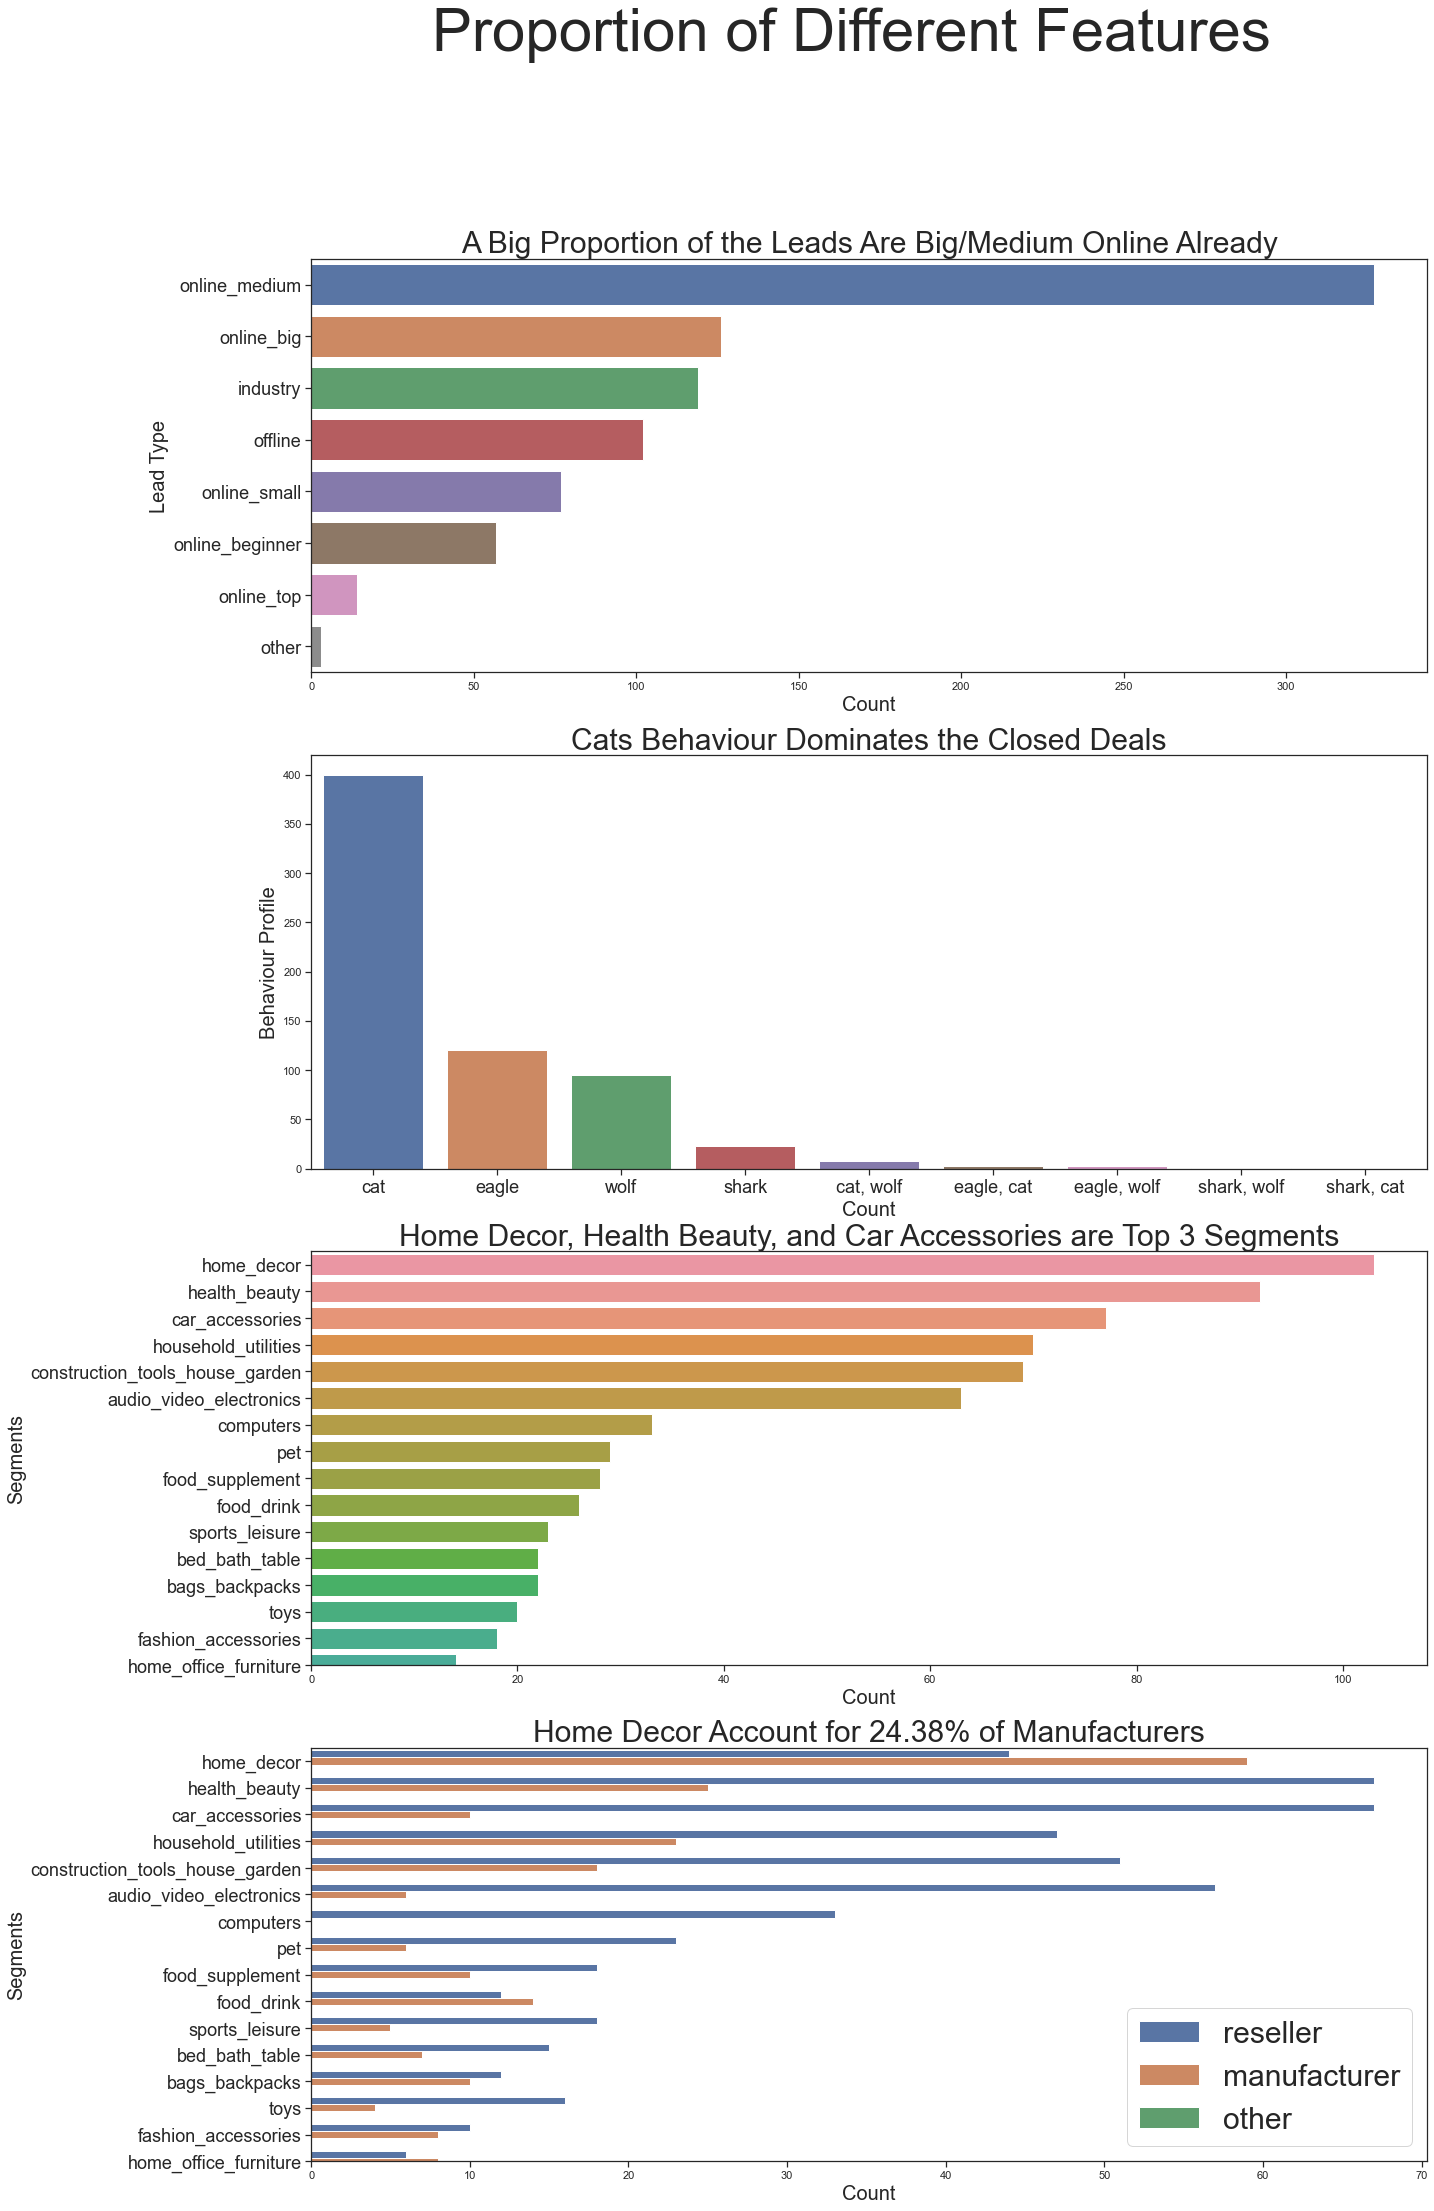

In [1574]:
fig, axs = plt.subplots(4,1,figsize=(20,35))
fig.suptitle("Proportion of Different Features", fontsize=60)


# Axs 1
ax1 = sns.countplot(
    ax=axs[0],
    data=funnel,
    y='lead_type',
    order = funnel['lead_type'].value_counts().index,
    orient='h'
)

axs[0].set_title('A Big Proportion of the Leads Are Big/Medium Online Already', fontsize=30)
axs[0].set_xlabel('Count', fontsize=20)
axs[0].set_ylabel('Lead Type', fontsize=20)

ax1.set_yticklabels(ax1.get_ymajorticklabels(), fontsize = 18)

# Axs 2
ax2 = sns.countplot(
    ax=axs[1],
    data=funnel,
    x='lead_behaviour_profile',
    order = funnel['lead_behaviour_profile'].value_counts().index
)

axs[1].set_title('Cats Behaviour Dominates the Closed Deals', fontsize=30)
axs[1].set_xlabel('Count', fontsize=20)
axs[1].set_ylabel('Behaviour Profile', fontsize=20)

ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 18)

# Axs 3
ax3 = sns.countplot(
    ax=axs[2],
    data=funnel,
    y='business_segment',
    order = funnel['business_segment'].value_counts().index,
    orient='h'
)

axs[2].set_title('Home Decor, Health Beauty, and Car Accessories are Top 3 Segments', fontsize=30)
axs[2].set_xlabel('Count', fontsize=20)
axs[2].set_ylabel('Segments', fontsize=20)
axs[2].set_ylim(15)

ax3.set_yticklabels(ax3.get_ymajorticklabels(), fontsize = 18)


# Axs 4
ax4 = sns.countplot(
    ax=axs[3],
    data=funnel,
    y='business_segment',
    hue='business_type',
    order = funnel['business_segment'].value_counts().index,
    orient='h'
)

axs[3].set_title('Home Decor Account for 24.38% of Manufacturers', fontsize=30)
axs[3].set_xlabel('Count', fontsize=20)
axs[3].set_ylabel('Segments', fontsize=20)
axs[3].set_ylim(15)
axs[3].legend(fontsize=30)

ax4.set_yticklabels(ax4.get_ymajorticklabels(), fontsize = 18)

plt.show()

In [196]:
# What are the proportion of business_type
funnel['business_type'].value_counts(normalize=True).apply(lambda x: x*100)

reseller        70.303030
manufacturer    29.333333
other            0.363636
Name: business_type, dtype: float64

In [197]:
# lead_type proportion
funnel['lead_type'].value_counts(normalize=True).apply(lambda x: x*100)

online_medium      39.636364
online_big         15.272727
industry           14.424242
offline            12.363636
online_small        9.333333
online_beginner     6.909091
online_top          1.696970
other               0.363636
Name: lead_type, dtype: float64

In [203]:
# Largest 5 business segments
funnel['business_segment'].value_counts(normalize=True).apply(lambda x: x*100).nlargest(10)

home_decor                         12.484848
health_beauty                      11.151515
car_accessories                     9.333333
household_utilities                 8.484848
construction_tools_house_garden     8.363636
audio_video_electronics             7.636364
computers                           4.000000
pet                                 3.515152
food_supplement                     3.393939
food_drink                          3.151515
Name: business_segment, dtype: float64

In [219]:
# (home_decor manufacturer) / manufacturer
print(f"Home Decor account for {funnel[(funnel['business_segment']=='home_decor') & (funnel['business_type']=='manufacturer')].shape[0] / (funnel['business_type']=='manufacturer').sum()*100:.2f}% of the manufacturer clients")

Home Decor account for 24.38% of the manufacturer clients


We first found see that big/medium online merchants account for 54.90% of the merchants. This insight is interesting, because recall that we have more than 94% of the declared monthly revenue set at 0s, and we had the assumption that it was due to Mom-and-Pops not having capabilities to grasp the financials, but this number seems to be telling a different story. We need to understand the consultancy process to understand why are we not recording anything.

We also see that cats dominate the behaviour profile. We may want to examine why we are so successful at closing cats. At the same time, it would be interesting to see how do they perform post-sales.  

As for the business segment, we see home decor, health beauty, and car accessories account for nearly one third of the merchants. Interestingly, we also see that nearly 25% of the manufacturers are in the home decor segment. If we are able to close these deals efficiently due to their segment, we should explore the business development opportunity.

Basic EDA Plan Remaining:
- ~Proportion of~:
    - ~business segment~
    - ~lead type~
    - ~lead behaviour profile~
    - ~business type~
- Compare origin in the funnel dataset to the original proportion
- Distribution of declared_monthly_revenue to suggest revenue range

In [240]:
print("Marketing Qualified Leads Origin")
display(mql['origin'].value_counts(normalize=True).apply(lambda x: x*100))
print("\b")
print("Closed Deals Media Origin")
display(funnel['origin'].value_counts(normalize=True).apply(lambda x: x*100))
print("\b")
print("Percentage Difference")
display((funnel['origin'].value_counts(normalize=True).apply(lambda x: x*100)) - 
        (mql['origin'].value_counts(normalize=True).apply(lambda x: x*100)))

Marketing Qualified Leads Origin


organic_search       28.7000
paid_search          19.8250
social               16.8750
other                16.3625
direct_traffic        6.2375
email                 6.1625
referral              3.5500
display               1.4750
other_publicities     0.8125
Name: origin, dtype: float64


Closed Deals Media Origin


organic_search       32.121212
paid_search          23.393939
other                23.272727
social                9.090909
direct_traffic        6.545455
referral              2.909091
email                 1.696970
display               0.606061
other_publicities     0.363636
Name: origin, dtype: float64


Percentage Difference


direct_traffic       0.307955
display             -0.868939
email               -4.465530
organic_search       3.421212
other                6.910227
other_publicities   -0.448864
paid_search          3.568939
referral            -0.640909
social              -7.784091
Name: origin, dtype: float64

Just from reading the proportion of the media origin for Search actually went from 48% in aggregate to from Marketing Qualified Leads to 55%! We also notice that other than direct traffic, email and social have dropped significantly, about 4% and 7% respectively. What accounts for a big portion of change is the drastic drop in social. As mentioned during data cleaning, we do know that social is the third largest source of lead generation, but the conversion from social source is also relatively the worst, further proving that we need to understand the nuances of what is happening with the social element, because we may be paying high labour cost for social, yet it is the worst performing media.

Basic EDA Plan Remaining:
- ~Proportion of~:
    - ~business segment~
    - ~lead type~
    - ~lead behaviour profile~
    - ~business type~
- ~Compare origin in the funnel dataset to the original proportion~
- Distribution of declared_monthly_revenue to suggest revenue range

Lastly, we will take a look at the distribution of the declared monthly revenue to suggest a revenue range. As mentioned previously, however, we should certainly dive into why we are not recording the revenue as much as we should.

In [288]:
# How many non-zeros do we have?
funnel[funnel['declared_monthly_revenue']!=0].shape[0]

45

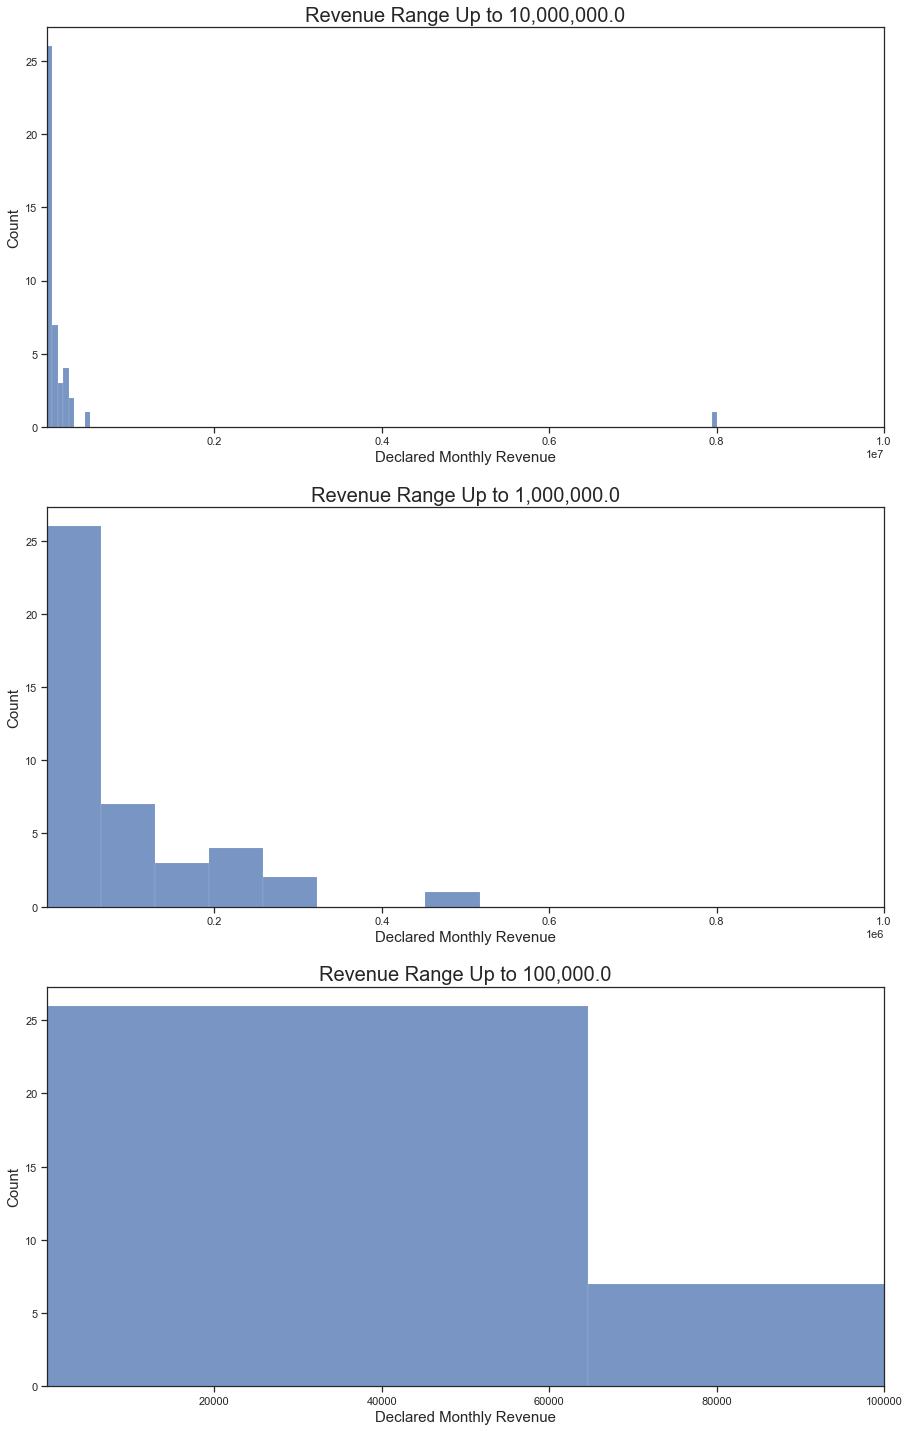

In [286]:
fig, ax = plt.subplots(3,1,figsize=(15,25))
rev = funnel['declared_monthly_revenue'].where(funnel['declared_monthly_revenue']!=0).dropna()
sns.histplot(rev, ax=ax[0])
ax[0].set_xlim(xmin=1, xmax=1e7)
ax[0].set_title(f'Revenue Range Up to {1e7:,}', fontsize=20)
ax[0].set_xlabel('Declared Monthly Revenue', fontsize=15)
ax[0].set_ylabel('Count', fontsize=15)

sns.histplot(rev, ax=ax[1])
ax[1].set_xlim(xmin=1, xmax=1e6)
ax[1].set_title(f'Revenue Range Up to {1e6:,}', fontsize=20)
ax[1].set_xlabel('Declared Monthly Revenue', fontsize=15)
ax[1].set_ylabel('Count', fontsize=15)

sns.histplot(rev, ax=ax[2])
ax[2].set_xlim(xmin=1, xmax=1e5)
ax[2].set_title(f'Revenue Range Up to {1e5:,}', fontsize=20)
ax[2].set_xlabel('Declared Monthly Revenue', fontsize=15)
ax[2].set_ylabel('Count', fontsize=15)

plt.show()

From the histograms above, we can see that out of the 45 samples we currently have, most of them reside at 60,000 or under. We then see some counts between 60,000 to 300,000. Anything above the 300,000 is around only 1 count. From what we see here, we recommend a monthly range of:

- 0~50,000R
- 50,000~300,000R
- 300,000R+

This classification should tell a cleaner story on our dataset and help differentiate small, medium, and large merchants. On the other hand, the heavy caveat is this classifciation is only decided based on less than 6% of the data points, and we highly recommend digging into why there are so many 0's recorded before setting too hard on the ranges. 

Basic EDA Plan Remaining:
- ~Proportion of~:
    - ~business segment~
    - ~lead type~
    - ~lead behaviour profile~
    - ~business type~
- ~Compare origin in the funnel dataset to the original proportion~
- ~Distribution of declared_monthly_revenue to suggest revenue range~

[Back to Top](#Table-of-Content)

#### Conversion

The very first metric we could look at is the conversion rate. How many Marketing Qualified Leads actually converted to winners? We will take a look at:

- The overall conversion rate
- The overall conversion rate within date range
- Distribution of lead-to-close time difference

The overall conversion rate just looks at how many leads were generated and how many were converted to Closed Deals. 

In [63]:
# Align datetime format for to perform analysis
from datetime import datetime
funnel['won_date'] = pd.to_datetime(funnel["won_date"].dt.strftime('%Y-%m-%d'))

In [297]:
# Regardless of date range
print("For the two given datasets,")
print(f"{funnel.shape[0] / mql.shape[0] * 100}% of the Marketing Qualified Leads were converted to Closed Deals")

# Set date range
start = funnel['won_date'].sort_values().iloc[0]
end = funnel['won_date'].sort_values().iloc[-1]
print("\b")
# Align of date range
print("But if we align the timeline,")
print(f"{funnel[(funnel['first_contact_date']>=start) & (funnel['first_contact_date']<=end)].shape[0] / mql.shape[0] * 100}% of the Marketing Qualified Leads were converted to Closed Deals")

For the two given datasets,
10.3125% of the Marketing Qualified Leads were converted to Closed Deals

But if we align the timeline,
9.6875% of the Marketing Qualified Leads were converted to Closed Deals


In a crude fashion, we see that our conversion rate is roughly 10%. Unfortunately, if we were able to see out of the lost deals, how many showed up at schedule vs. how many did not, we may have a further nuance from Marketing Qualified Leads to Consultancy, and from Consultancy to Closed Deals.

Additionally, we know that there is a lag between first contact date and actual close date. This entails there could be multiple interactions, and time difference may stretch very long. We want to take a look at the distribution of the MQL-to-Closed time difference.

Remaining:
- ~The overall conversion rate~
- ~The overall conversion rate within date range~
- Distribution of lead-to-close time difference

In [316]:
# diff is the difference between Closed Date and First Contact Date
diff = ((funnel['won_date'] - funnel['first_contact_date']) / np.timedelta64(1,'D'))

In [374]:
def momentum(diff, days):
    '''
    A function that takes the difference of dates in order to examine momentum
    '''
    closed = []
    for i in range(days):
        closed.append((diff <= i).value_counts(normalize=True).apply(lambda x: x*100).loc[True])
    return pd.Series(closed)

In [1589]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x = momentum(diff, 365).index, y=momentum(diff, 365),name = 'Deals Closed by nth Day'),)
fig.add_trace(go.Scatter(x = momentum(diff, 365).index, y=momentum(diff, 365).diff(),name = 'Rate of Increase for n-1 Day'), secondary_y=True,)
fig.update_layout(title_text="Half of the Deals Were Closed In 14 Days", title_x=0.5)
fig.update_xaxes(title_text="Number of Days Between First Contact Day to Deal Closed")
fig.update_yaxes(title_text="Deals Won at <b>X</b> Day", secondary_y=False)
fig.update_yaxes(title_text="Closing <b>Momentum</b>", secondary_y=True)
fig.update_layout(legend=dict(
    yanchor="middle",
    y=0.5,
    xanchor="right",
    x=0.9,
    font=dict(
            family="Overpass",
            size=20,
            color="black"
)))
fig.show()

From the interactive plot above (recommend turning on double-hover), we can see that half of the deals were closed within 14 days, and the momentum starts dropping off really fast from the 7th day. The fourth week would see momentum drop to below 1% everyday. Two-thirds of the deals were won exactly within 31 days. 

It is highly recommended that we find every way we can to close within 7 calendar days, and anything stretched beyond one month should be seen as a dead end. Note that if we have a more complete monthly revenue data, this recommendation may change, as larger clients take longer time to close.

One of the major KPI that we can keep a lookout for is average lead_to_close days per SR. SRs are there to close deals, and if they take a long time to close deals, unless they are closing big clients, they are underperforming. The top 5 Sales Representative close within 22 days on average, but our overall is 105 days. That being said, we do not know the value of these customers until we join with eCommerce data. Without declared monthly revenue for all top 5, the top 6 seems to be our super start given the short lead-to-close duration and high declared monthly revenue.

In [1023]:
# Taking a look at average lead_to_close per Sales Representative
funnel['lead_to_close'] = (funnel['won_date'] - funnel['first_contact_date']) / np.timedelta64(1,'D')
pd.DataFrame(funnel.groupby(['sr_id']).mean()).sort_values('lead_to_close')

declared_monthly_revenue  lead_to_close
sr_id                                                                    
9e4d1098a3b0f5da39b0bc48f9876645                  0.000000      17.000000
fbf4aef3f6915dc0c3c97d6812522f6a                  0.000000      21.966102
c638112b43f1d1b86dcabb0da720c901                  0.000000      22.727273
060c0a26f19f4d66b42e0d8796688490                  0.000000      25.218750
6565aa9ce3178a5caf6171827af3a9ba                  0.000000      26.013699
4ef15afb4b2723d8f3d81e51ec7afefe             383053.435115      30.183206
85fc447d336637ba1df43e793199fbc8               1562.500000      33.703125
9ae085775a198122c5586fa830ff7f2b                  0.000000      41.489796
2695de1affa7750089c0455f8ce27021               1754.385965      44.596491
d3d1e91a157ea7f90548eef82f1955e3               5062.500000      47.625000
495d4e95a8cf8bbf8b432b612a2aa328               7000.000000      49.850000
56bf83c4bb35763a51c2baab501b4c67              12500.000000      55.125000
de63de0d10a6012430098db33c679b0b             154326.923077      62.884615
a8387c01a09e99ce014107505b92388c              24038.692308      96.653846
068066e24f0c643eb1d089c7dd20cd73               7037.037037     122.333333
34d40cdaf94010a1d05b0d6212f9e909              19000.000000     172.000000
b90f87164b5f8c2cfa5c8572834dbe3f                  0.000000     175.000000
4b339f9567d060bcea4f5136b9f5949e              31250.000000     194.500000
9d12ef1a7eca3ec58c545c678af7869c              43333.333333     214.333333
9749123c950bf8363ace42cb1c2d0815             103571.428571     234.000000
0a0fb2b07d841f84fb6714e35c723075               6000.000000     306.000000
6aa3b86a83d784b05f0e37e26b20860d               8000.000000     321.000000

In [1024]:
# Average sales duration 
pd.DataFrame(funnel.groupby(['sr_id']).mean()).sort_values('lead_to_close').mean()

declared_monthly_revenue    36704.101609
lead_to_close                 105.191071
dtype: float64

In [1025]:
# Average sales duration for top 5
pd.DataFrame(funnel.groupby(['sr_id']).mean()).sort_values('lead_to_close').head(5).mean()

declared_monthly_revenue     0.000000
lead_to_close               22.585165
dtype: float64

Remaining:
- ~The overall conversion rate~
- ~The overall conversion rate within date range~
- ~Distribution of lead-to-close time difference~

[Back to Top](#Table-of-Content)

#### Time Series Analysis

In this section, we will perform some time series analysis, utilizing Facebook's Prophet library, to explore lead generation over time as well as Closed Deals. In order to perform time series analysis, we need to make sure the datasets are using timestamps as the index.

In [824]:
# Calling Olist instance
from eCommerce.data import Olist
from datetime import datetime
olist = Olist()
olist.table_names()
olist.tables

{'closed_deals': 'olist/olist_closed_deals_dataset.csv',
 'customers': 'olist/olist_customers_dataset.csv',
 'geolocation': 'olist/olist_geolocation_dataset.csv',
 'marketing_qualified_leads': 'olist/olist_marketing_qualified_leads_dataset.csv',
 'order_items': 'olist/olist_order_items_dataset.csv',
 'order_payments': 'olist/olist_order_payments_dataset.csv',
 'order_reviews': 'olist/olist_order_reviews_dataset.csv',
 'orders': 'olist/olist_orders_dataset.csv',
 'products': 'olist/olist_products_dataset.csv',
 'sellers': 'olist/olist_sellers_dataset.csv'}

In [825]:
# Get Marketing Qualified Leads and Closed Deals
mql = olist.get_table(key='marketing_qualified_leads', clean=True)
cd = olist.get_table(key='closed_deals', clean=True)

# Merge the two tables as funnel
funnel = pd.merge(
    left=cd, 
    right=mql,
    on='mql_id',
    how='inner',
)

In [826]:
# Making sure Marketing Qualified Leads is following chronological dates on its index
mql = mql.sort_values('first_contact_date')
mql = mql.set_index('first_contact_date')


# Making sure Closed Deals is following chronological dates on its index
cd = cd.sort_values('won_date')
cd = cd.set_index('won_date')

# Get counts of leads by day
mql_ = pd.DataFrame(mql['mql_id'].resample('1D').count())
cd_ = pd.DataFrame(cd['mql_id'].resample('1D').count())

Before going further, let's simply plot the two datasets on a chart to take a look. We can see that there is a clear tick-up from January 2018. Given that Olist was founded in 2015, it could be Olist going viral, or it could simply seasonal. Unfortunately, we do not have longer than a year of data to simply eyeball that, but we can do our best to perform further analysis.

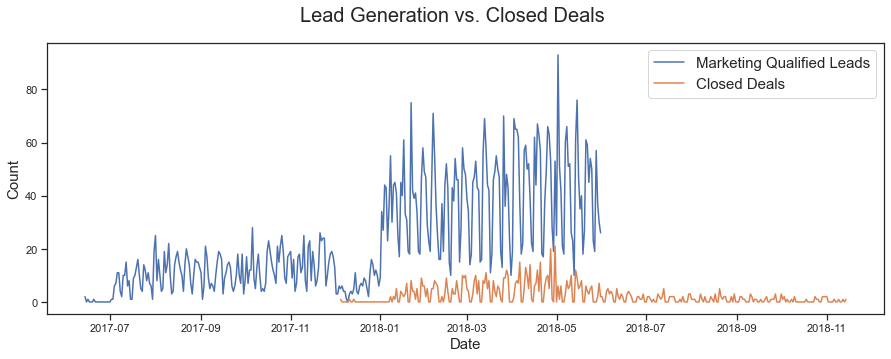

In [827]:
fig, ax1 = plt.subplots(figsize = (15,5))
fig.suptitle('Lead Generation vs. Closed Deals', fontsize=20)
ax1.plot(mql_)
ax1.plot(cd_)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.legend(('Marketing Qualified Leads','Closed Deals'), fontsize=15)
plt.show()

Time series data can be messy to look at and work with, but we can decompose a time series data into three components:
* Trend
* Seasonality
* Noise/Residual

<img src = 'https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/01/Multiplicative-Decomposition-of-Airline-Passenger-Dataset.png' width = 700 height = 600>

We can simply eyeball and see that Lead Generation is definitely not Stationary, but what about Closed Deals? Here we will perform an Augmented Dickey-Fuller test, where Null Hypothesis is that the time series has a unit root or time-dependent variable, and if we fail to reject the Null Hypothesis (p-value > 0.05), then we cannot assume it is stationary. 

We can clearly see that for Closed Deals, they are not stationary in during the summer, but did they become stationary later? If so, when? After performing the test starting from May, June, and July, we found that it is in June that the time series really starts becoming stationary.

In [1610]:
# Code borrowed from: https://bit.ly/3d79epL
from statsmodels.tsa.stattools import adfuller
may = adfuller(cd_.loc['2018-05-01':])
print('From May')
print('ADF Statistic: %f' % may[0])
print('p-value: %f' % may[1])
print('\b')

june = adfuller(cd_.loc['2018-06-01':])
print('From June')
print('ADF Statistic: %f' % june[0])
print('p-value: %f' % june[1])
print('\b')

july = adfuller(cd_.loc['2018-07-01':])
print('From July')
print('ADF Statistic: %f' % july[0])
print('p-value: %f' % july[1])
print('\b')

From May
ADF Statistic: -1.684110
p-value: 0.439318

From June
ADF Statistic: -2.834552
p-value: 0.053505

From July
ADF Statistic: -3.511988
p-value: 0.007684



Prophet is a simple tool developed by Facebook to perform univariate time series prediction. We will first plot with Marketing Qualified Leads data and explore some patterns. As previously mentioned, with only a year's worth of data, especially as the data changed in such a drastic measure since January for lead generation, it is very hard to determine yearly seasonality. We are able, however, to detect on shorter timeframe.

In [978]:
from fbprophet import Prophet
m = Prophet(
    interval_width = 0.95,
    yearly_seasonality = False,
    weekly_seasonality = True,
    daily_seasonality = False,
    holidays = None,
    changepoint_prior_scale = 0.01
)
m.fit(mql_.reset_index().rename(columns={"first_contact_date": "ds", "mql_id": "y"}).loc[:])
future = m.make_future_dataframe(periods=15, freq = 'D')
forecast = m.predict(future)

In [979]:
plot_plotly(m, forecast)

In [980]:
plot_components_plotly(m, forecast)

In general, Prophet tries to predict with the blue lines, and we have several parameters to play with. By default, it is performing time series prediction with a linear model, which is good for inference. The black dots represent the actual data, and we have made 15 days of future prediction with the current model. 

Although not shown here, we have played with several different parameters, and all of them indicate that Monday is the single most important day when it comes to Market Qualified Lead generation.

Let's also take a look at the Closed Deals.

In [1013]:
cd_ = pd.DataFrame(cd['mql_id'].resample('1H').count())

In [1027]:
m = Prophet(
    interval_width = 0.95,
    yearly_seasonality = False,
    weekly_seasonality = True,
    daily_seasonality = True,
    holidays = None,
    changepoint_prior_scale = 0.05
)
m.fit(cd_.reset_index().rename(columns={"won_date": "ds", "mql_id": "y"}).loc[:])
future = m.make_future_dataframe(periods=360, freq = 'H')
forecast = m.predict(future)

In [1015]:
plot_components_plotly(m, forecast)

As Closed Deals actually has timestamp, we have decided to resample the dataset and make counts on Closed Deals based on Hours. Interestingly, there seem to be a good indication that it is easier to close deals during meal time, especially dinner time, as the daily seasonality suggests. Note that seasonality is different from pure count, as seasonality is part of the three major components (trend, seasonality, and residual) that finds out the long-term pattern. 

Below, we resampled Closed Deals again in Daily, and we see that despite an overall uptrend in Marketing Quality Leads generation, Closed Deals seems to be telling a different story.

In [1030]:
cd_ = pd.DataFrame(cd['mql_id'].resample('1D').count())

m = Prophet(
    interval_width = 0.95,
    yearly_seasonality = False,
    weekly_seasonality = True,
    daily_seasonality = True,
    holidays = None,
    changepoint_prior_scale = 0.05
)
m.fit(cd_.reset_index().rename(columns={"won_date": "ds", "mql_id": "y"}).loc[:])
future = m.make_future_dataframe(periods=360, freq = 'H')
forecast = m.predict(future)

In [1031]:
plot_plotly(m, forecast)

#### Insights and Recommendations From Exploring the Funnel
Time Series Analysis is a very big topic, but not a major focus of this deliverable. Before going into the last section of analysis, we will first wrap up some of the insights and recommendations throughout this section.

Insights:
- 55% of the merchants are big/medium online merchants
- Cats dominate behaviour profile in Closed Deals
- Nearly 25% of the manufacturers, which is also one-third of the total clients, are in the Home Decor business
- 94% of declared monthly revenue at 0s thus does not make sense (typical Mom-and-Pops problems should be less common)
- Of the 45 samples with declared monthly revenue, most reside 60,000R or under. 
- Conversion from MQL to Closed is roughly 10%, but missing value insights as to which leads showed up but turned down the opportunity, and which leads did not even show up
- Average sales duration for top 5 SRs is 22 days, but overall is 105 days. Rank 6 is super star, since top 5 SRs do not have declared monthly revenue.
- There seems to be an overall uptrend for Marketing Quality Leads, but not Closed Deals.

Recommendations:
- Explore with SDRs why there are so many missing values in declared monthly revenue
- Explore business development opportunity with Home Decor related matters
- Classification of range: 0-50,000R, 50,000-300,000R, and 300,000R+, subject to better sample size
- We need data on the lost deals to understand why we lost 90% of the leads. 
- We need at least 2 years worth of data to determine yearly seasonality to examine if the downtrend of Closed Deals is just cyclical 

[Back to Top](#Table-of-Content)

### Post-Sales

As we close our deals, it is important to recognize that the success of Olist's business is the success of customers. For this deliverable, due to time constraint, we will only explore the tip of the iceberg of what we could define as customer success. Recall Olist's schema, we will inner join `funnel` with the Seller dataset, then Order Item dataset, and then inner join the Orders dataset

<img src="https://i.imgur.com/HRhd2Y0.png" align="center" alt="E-Commerce Schema" width="60%">
</img>



In [1037]:
# Call the data instance again
post_sales = Olist()
post_sales.table_names()
post_sales.tables

{'closed_deals': 'olist/olist_closed_deals_dataset.csv',
 'customers': 'olist/olist_customers_dataset.csv',
 'geolocation': 'olist/olist_geolocation_dataset.csv',
 'marketing_qualified_leads': 'olist/olist_marketing_qualified_leads_dataset.csv',
 'order_items': 'olist/olist_order_items_dataset.csv',
 'order_payments': 'olist/olist_order_payments_dataset.csv',
 'order_reviews': 'olist/olist_order_reviews_dataset.csv',
 'orders': 'olist/olist_orders_dataset.csv',
 'products': 'olist/olist_products_dataset.csv',
 'sellers': 'olist/olist_sellers_dataset.csv'}

In [1039]:
# We need order_items and orders
sellers = post_sales.get_table('sellers')
order_items = post_sales.get_table('order_items')
orders = post_sales.get_table('orders')

In [1058]:
# Inner join orders a
# ps means Post-Sales
ps = pd.merge(left=funnel, right=sellers, how='inner', on='seller_id')
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 373
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   mql_id                    374 non-null    object        
 1   seller_id                 374 non-null    object        
 2   sdr_id                    374 non-null    object        
 3   sr_id                     374 non-null    object        
 4   won_date                  374 non-null    datetime64[ns]
 5   business_segment          374 non-null    object        
 6   lead_type                 374 non-null    object        
 7   lead_behaviour_profile    286 non-null    object        
 8   business_type             374 non-null    object        
 9   declared_monthly_revenue  374 non-null    float64       
 10  first_contact_date        374 non-null    datetime64[ns]
 11  landing_page_id           374 non-null    object        
 12  origin                

Interestingly, after inner join, we see a huge drop in data points. This means only 45% of the seller data are in this dataset, which makes sense, as the Closed Deals extended to later dates than Marketing Qualified Leads. We will continue our quest to create bigger joins.

In [1059]:
# Join order items
ps = pd.merge(left=ps, right=order_items, how='inner', on='seller_id')

# Join orders
ps = pd.merge(left=ps, right=orders, how='inner', on='order_id')

In [1062]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4991 entries, 0 to 4990
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         4991 non-null   object        
 1   seller_id                      4991 non-null   object        
 2   sdr_id                         4991 non-null   object        
 3   sr_id                          4991 non-null   object        
 4   won_date                       4991 non-null   datetime64[ns]
 5   business_segment               4991 non-null   object        
 6   lead_type                      4991 non-null   object        
 7   lead_behaviour_profile         3261 non-null   object        
 8   business_type                  4991 non-null   object        
 9   declared_monthly_revenue       4991 non-null   float64       
 10  first_contact_date             4991 non-null   datetime64[ns]
 11  landing_page_id  

We now have a large list of orders from the 375 sellers of our interests. To measure a funnel's effectiveness, typically we would need to incorporate marketing cost for analysis, which is a missing data point here. We will first transform the dataset to follow `order_purchase_timestamp` as the index.

In [1066]:
# Change dtype for timestamp
ps['order_purchase_timestamp'] = pd.to_datetime(ps['order_purchase_timestamp'])

# Order the table by timestamp and set timestamp as index
ps = ps.sort_values('order_purchase_timestamp').set_index('order_purchase_timestamp')

In [1098]:
# What is the time range of ps?
print(f"from {ps.index[0]} to {ps.index[-1]}")
ps.index[-1] - ps.index[0]

from 2018-01-24 19:13:01 to 2018-08-29 14:52:00


Timedelta('216 days 19:38:59')

[Back to Top](#Table-of-Content)

#### Single Seller Metrics

When it comes to Olist, Metrics to track a single seller becomes very important. We need to measure a client's success and follow-up/assist where necessary. We have wrote a function that aims to perform Single Seller metrics, aiming to simplify the analytics process. The function by defaults takes in the price feature, which indicates gross sales, but can be used for other features, such as freight price.

Currently on the list includes:

`daily_sum`: To help analyize daily sales.

`daily_mean`: Returns a daily average for a given seller.

`cumsum`: Cumulative sales over time for a given seller.

`total_growth`: Total growth in percentage from Day 1 for a given seller.

In [1531]:
import random
def single_seller(ps, feature='price', seller_id = None, resample = '1D', function = 'cumsum'):
    '''
    A custom function that helps examine a seller's performance over time
    '''
    if seller_id == None:
        seller = random.choice([x for x in ps['seller_id']])
    else:
        seller = seller_id
    
    sum_ = pd.DataFrame(ps[ps['seller_id']==seller][feature].resample(resample).sum())
    
    if function == 'daily_sum':
        return sum_
    
    elif function == 'daily_mean':
        return sum_.mean()
    
    elif function == 'cumsum':
        return sum_.cumsum()
    
    elif function == 'total_growth':
        start = float(sum_.cumsum().iloc[0])
        end = float(sum_.cumsum().iloc[-1])
        return ((end - start) / start)

    else:
        raise Exception("Invalid function")

In [1532]:
# Plotting Daily Total Sales and Cumulative Sales Throughout the 216 Days
# Randomly selects a seller
random.seed(39)
seller = random.choice([x for x in ps['seller_id']])
tg = single_seller(ps=ps, seller_id = seller, function='total_growth')
cs = single_seller(ps=ps, seller_id = seller, function='cumsum')
print(f"Total growth for the random seller is {tg:.2f}%, from {float(cs.iloc[0]):.2f} to {float(cs.iloc[-1]):.2f}")

Total growth for the random seller is 407.75%, from 277.99 to 113628.97


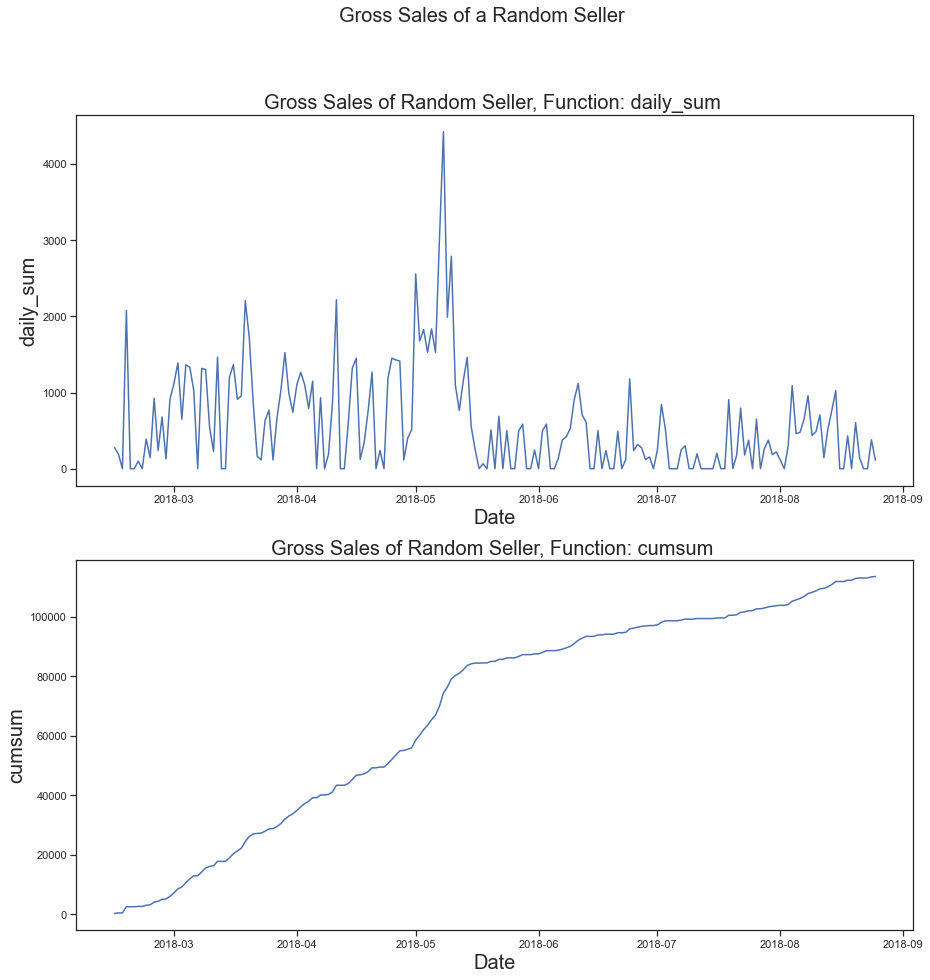

In [1533]:
# Plotting Daily Total Sales and Cumulative Sales Throughout the 216 Days
functions = ['daily_sum', 'cumsum']

fig, ax = plt.subplots(len(functions),1, figsize = (15,15))

fig.suptitle('Gross Sales of a Random Seller', fontsize=20)

for i, func in zip(range(len(functions)), functions):
    ax[i].plot(single_seller(ps=ps, seller_id = seller, function = func))
    ax[i].set_title(f"Gross Sales of Random Seller, Function: {func} ", fontsize=20)
    ax[i].set_xlabel('Date', fontsize=20)
    ax[i].set_ylabel(f'{func}', fontsize=20)

plt.show()

We will plot `daily_sum` and `cumsum` for a random seller. We notice that this seller has been selling for 7 months and has experienced a drastic growth in sales in the beginning of May. After mid May, however, we start to see some slow down. Some of the questions we could ask include, was it influenced by advertisement, seasonal factor, or other reasons?

We again take a look at their cumulative sum, and we can see a great stable slope in the first couple of months, having an explosive first half of May, before the momentum starts slowing down. 

With this function, we can also take a look at multiple sellers. For example, in the plot below, we acquire the total growth rate of all 374 sellers in our post-sales analysis dataset and plot a histogram. 

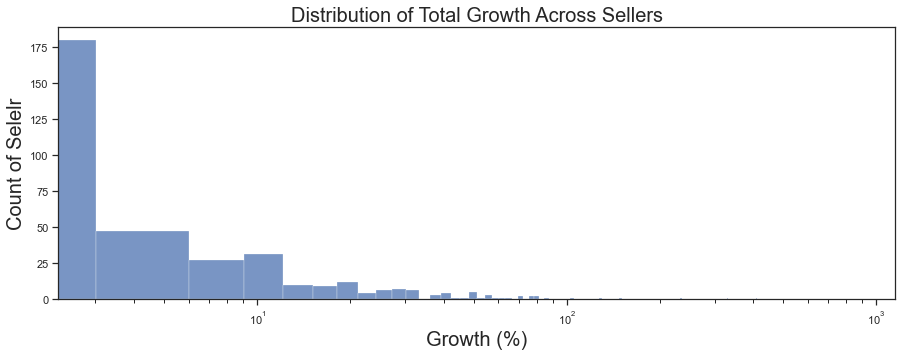

In [1539]:
# Distribution of Seller Total Growth in the 216 days 
all_ = []
for s in ps['seller_id'].unique():
    all_.append(float(single_seller(ps=ps, 
                                    function='total_growth', 
                                    seller_id = s)))

fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(all_, ax=ax)
ax.set_title(f"Distribution of Total Growth Across Sellers", fontsize=20)
ax.set_xlabel('Growth (%)', fontsize=20)
ax.set_xscale('log')
ax.set_ylabel(f'Count of Selelr', fontsize=20)
plt.show()

In [1550]:
# How many sellers have gr
print(f"{sum(map(lambda x: x < 10, all_)) / len(ps['seller_id'].unique()) * 100:.2f}% of sellers didn't reach 10% total growth")

69.79% of sellers didn't reach 10% total growth


We can see from the above graph that, throughout the 216 days, 70% of the sellers never reached 10%. This type of analysis helps us to be nimble and signal possible problems. There certainly are more to explore in the Post Sales Analysis, but we will continue with the quest in the futre.

[Back to Top](#Table-of-Content)

## Conclusion

In this Notebook, we didn't get to perform any machine learning, as we are still trying to grasp the business landscape. Olist is a marketplace of marketplaces. Where the growth of consumers is important to a two-sided platform, it is more important for Olist to monitor merchant success because the business model itself relies on Customer-Led Growth. After having explored much of the Pre-Closed funnel and a little bit of Post Sales Analysis, here are some of the insights and recommendations:

#### After Data Cleaning

Insights:
- Search and social account for nearly two-third of the leads generated
- Search accounts for 48.52% of the leads generated, indicating successful Search Engine Optimization or Word of Mouth
- Social accounts for 16.87% of the leads generated, but there is no documentation as to how social was performed
- 94% of the `decared_monthly_revenue` are in 0s, and the values scatter around much 6 Real.
- There are about 20% of missing values on `lead_behaviour_profile`, and there are 3 `sdr_id` that are commonly associated with the missing values

|origin|leads generated|
|:--|:--|
|`organic_search`|28.70%|
|`paid_search`|19.82%|
|`social`|16.87%|
|`other`|16.36%|
|`direct_traffic`|6.23%|
|`email`|6.16%|
|`referral`|3.55%|
|`display`|1.47%|
|`other_publicities`|0.81%|

|sdr_id|total closed|total missing profile|percentage|
|:--:|:--:|:--:|:--:|
|56bf83c4bb35763a51c2baab501b4c67|74|34|45.95%|
|fdb16d3cbbeb5798f2f66c4096be026d|34|27|79.41%|
|de63de0d10a6012430098db33c679b0b'|53|41|77.36%|
 
Recommendations:
- Dive deeper into `social` activities to truly understand what accounts for 16.87% of the leads generated
- Examine deeper why the 3 Sales Development Representative are not able to indicate `lead_behaviour_profile`
- Create additional attribute that classify `declared_monthly_revenue` in ranges

[Back to Top](#Table-of-Content)

#### After Exploring Funnel

Insights:
- 55% of the merchants are big/medium online merchants
- Cats dominate behaviour profile in Closed Deals
- Nearly 25% of the manufacturers, which is also one-third of the total clients, are in the Home Decor business
- 94% of declared monthly revenue at 0s thus does not make sense (typical Mom-and-Pops problems should be less common)
- Of the 45 samples with declared monthly revenue, most reside 60,000R or under. 
- Conversion from MQL to Closed is roughly 10%, but missing value insights as to which leads showed up but turned down the opportunity, and which leads did not even show up
- Average sales duration for top 5 SRs is 22 days, but overall is 105 days. Rank 6 is super star, since top 5 SRs do not have declared monthly revenue.
- There seems to be an overall uptrend for Marketing Quality Leads, but not Closed Deals.

Recommendations:
- Explore with SDRs why there are so many missing values in declared monthly revenue
- Explore business development opportunity with Home Decor related matters
- Classification of range: 0-50,000R, 50,000-300,000R, and 300,000R+, subject to better sample size
- We need data on the lost deals to understand why we lost 90% of the leads. 
- We need at least 2 years worth of data to determine yearly seasonality to examine if the downtrend of Closed Deals is just cyclical 

[Back to Top](#Table-of-Content)

#### Metrics to Monitor

Here are some of the Key Performance Indicators that I would propose, given the current exploration, to the management team. This is subject to further exploration and development, especially in understanding the Post-Sales Analysis. 

**MQL Conversion**
This is the most basic yet important metric. Recall that in our Time Series Analysis section, we saw a great growth in trend for the Marketing Qualified Leads, but not so much so in the Closed Deals dataset. Despite having great lead generation, especially as organic search accounts for the largest source of leads, Sales Representatives have to be able to close deals. Although we were not given at least two years worth of data to statistically determine seasonality, if we start seeing drops in the MQL-to-Closed Conversion, then even without more than a year's data, we know it's not just about seasonality.

**Average Closing Duration**
In the EDA, we found that half of the deals were Closed in 7 days, and two-thirds by the first month. The average Closing Duration was, however, 105 days. Although there are nuances in how more than 94% of the declared monthly revenue was missing, hence unsure of top performers true value (they may be closing insignificant clients only), it is still an important metric to measure closing efficiency. 

**Missing Lead Behaviour Profile**
Recall that Lead Behaviour Profile is indicated by Sales Development Representatives or in other words, internally generated. This type of data, even if missed by SDRs for some reasons, should be appended after by Sales Representatives after meeting. Depending on the quality of such Behaviour Profile classification, we may be missing out on great machine learning opportunities simply because there are too much missing data and may generate great bias. At the same time, this metrics also helps us to understand SDRs effectiveness.

**Converting Proportion from Social**
Recall that `social` was the third largest source of Marketing Qualified Leads generation, accounting for 16% of the leads generated. It also, however, dropped the most in proportion by 7% in Closed Deals. As `social` tend to be laborious and high cost, we need to examine further on everything happening around `social`, whether to understand why it's successful in lead generation or terribly bad at closing. On top of my head, for example, overpromising or cold calling in spamming fashion by sales development representatives are common reasons.

As for now, these are the four metrics that we recommend monitoring to immediately boost performance. We will further analyze existing data to find further insights.

[Back to Top](#Table-of-Content)

#### Future Development 

Every analysis should be conducted with having the future development in mind. This is the exact reason why we have developed a module to clean the data and perform single seller analysis. Here are some of the direction that we could further develop on:

**Develop data.py**

`data.py` currently includes the `Olist()` class, `clea_df()` function, and `single_seller` function that we could develop into a class dedicated to Post-Sales Analysis. This helps us automate much of the data analysis pipeline, and the setup is easy to expand on. We have not had the chance to optimize the codes and create unit/output testing, but we will certainly implement them in the next few sprints.

**Create a Knowledge Base & Wiki**

We could see in this Notebook that the further we delve into the data, the more questions we have. Eventually, these important questinos would be unmanagable. It is recommended that we create and update a knowledge base to answer qualitative questions such as *what activities does `social` include to generate leads?*. The Knowledge Base could also include custom KPIs and their context. This can be done through tools like [Notion](https://www.notion.so/Knowledge-Base-Wiki-dd44949c0c474a1891830ad838a0f43b) or [Confluence](https://www.atlassian.com/software/confluence) . 

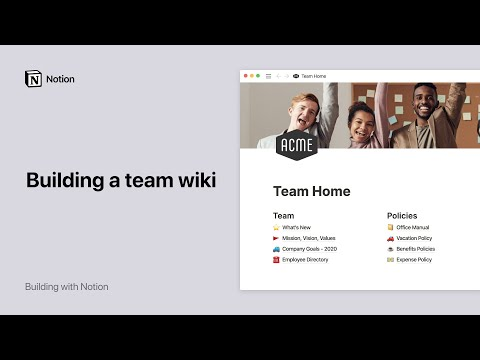

In [1566]:
from IPython.display import YouTubeVideo
YouTubeVideo('_fmzW1v3dnE', width = "75%")

**Advaned Statistical Analysis and Time Series Analysis**

Some of the advanced analysis were not done yet, as we spent much of our time on fundamental analysis. We were going to encode categorical data and examine correlation in the funnel. This, however, proved to be taking more time than desired as we need to conduct Variable Inflation Factor analysis and remove multicollinearity. 

Same with A/B testing, as the marketing data is not included here. We were not able to explore what is the Cost Per New Seller, nor do we know about if the jump in the summer was due to seasonality or actual decision from the marketing team. This is the type of experiment that A/B testing could explore.

Although we had a chance to conduct some statistical analysis with the Prophet library, it is more focused on modeling rather than statistical understanding. This, however, requires quite some research and studies.

**Machine Learning**

Although we didn't get to perform machine learning and A/B testing in this Notebook, they are certainly an option in the future. They may be an overkill at this moment, however, as we are missing quite some critical information in the Funnel. If we have better beahviour profiling, for example, we can join all the data from the Funnel to the main eCommerce dataset and perform predictive modeling on which behaviour profile are more likely to succeed Post-Sales. This type of modeling, however, can only be as good as the data quality, which is why we are spending much of the discussion purely around fundamental analysis.

These are some of the high-level thoughts on future development, and we take any direction the team requires us to.

[Back to Top](#Table-of-Content)